<a href="https://colab.research.google.com/github/arashkhgit/NLP_task/blob/main/SMS_Spam_Collection_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# SMS Spam Collection Dataset Analysis



**Load and Explore the Dataset:**
*   Load the dataset and take a look at the structure and content.





In [2]:
import pandas as pd
import zipfile
from io import BytesIO
import requests

# URL of the ZIP archive
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download the ZIP archive
response = requests.get(zip_url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extract the desired file
file_name = 'SMSSpamCollection'
with zip_file.open(file_name) as file:
    # Load the data into a DataFrame
    df = pd.read_csv(file, sep='\t', names=['label', 'message'])

# Display the first few rows of the DataFrame
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**Data Preprocessing:**

* Clean and preprocess the text data by removing punctuation, converting to lowercase, and tokenizing the text.

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing functions
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# Apply preprocessing to the messages
df['tokens'] = df['message'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Basic Analysis:**
* Compute basic statistics about the dataset, such as the number of words, unique words, and repeated words.

In [4]:
# Calculate the number of words in each message
df['word_count'] = df['tokens'].apply(len)

# Calculate the number of unique words in each message
df['unique_words'] = df['tokens'].apply(set)
df['num_unique_words'] = df['unique_words'].apply(len)

# Calculate the number of repeated words in each message
df['num_repeated_words'] = df['word_count'] - df['num_unique_words']

# Display basic statistics
print(df[['word_count', 'num_unique_words', 'num_repeated_words']].describe())


        word_count  num_unique_words  num_repeated_words
count  5572.000000       5572.000000         5572.000000
mean      9.481156          8.959978            0.521177
std       7.009635          6.202357            1.291238
min       0.000000          0.000000            0.000000
25%       4.000000          4.000000            0.000000
50%       7.000000          7.000000            0.000000
75%      14.000000         13.000000            1.000000
max      80.000000         62.000000           23.000000


**Part-of-Speech (POS) Tagging:**
* Perform POS tagging to identify the grammatical components of each message.

In [7]:
!pip install nltk

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Download the missing resource

# Preprocessing functions
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# POS tagging function
def pos_tagging(tokens):
    return pos_tag(tokens)

# Apply preprocessing to the messages
df['tokens'] = df['message'].apply(preprocess_text)

# Apply POS tagging to the tokens
df['pos_tags'] = df['tokens'].apply(pos_tagging)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
df['pos_tags']

0       [(go, VB), (jurong, JJ), (point, NN), (crazi, ...
1       [(ok, JJ), (lar, JJ), (joke, NN), (wif, NN), (...
2       [(free, JJ), (entri, NN), (2, CD), (wkli, NN),...
3       [(u, JJ), (dun, NNS), (say, VBP), (earli, JJ),...
4       [(nah, JJ), (dont, NN), (think, VBP), (goe, JJ...
                              ...                        
5567    [(2nd, CD), (time, NN), (tri, JJ), (2, CD), (c...
5568    [(ü, NN), (b, NN), (go, VBP), (esplanad, JJ), ...
5569    [(piti, RB), (mood, NN), (soani, JJ), (suggest...
5570    [(guy, NN), (bitch, NN), (act, NN), (like, IN)...
5571                 [(rofl, NN), (true, JJ), (name, NN)]
Name: pos_tags, Length: 5572, dtype: object

**Label Distribution:**
* Analyze the distribution of spam and ham messages in the dataset.

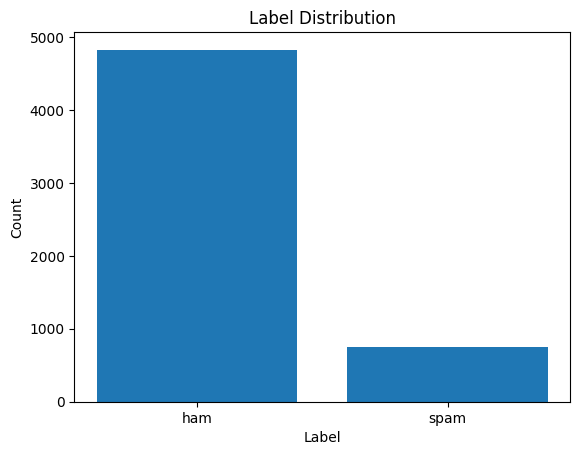

In [11]:
import matplotlib.pyplot as plt

# Count the number of spam and ham messages
label_counts = df['label'].value_counts()

# Plot the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()


**Advanced Analysis:**
* Explore advanced analysis techniques such as sentiment analysis and word cloud visualization.

In [13]:
# Download the vader_lexicon resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

nltk.download('wordnet')

# Lemmatization function
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Apply lemmatization to the tokens
df['lemmas'] = df['tokens'].apply(lemmatize_text)

# Calculate the frequency distribution of words
all_words = [word for tokens in df['lemmas'] for word in tokens]
word_freq = FreqDist(all_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...


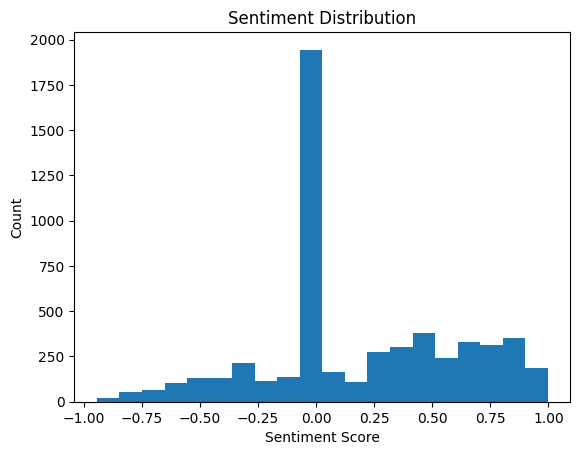

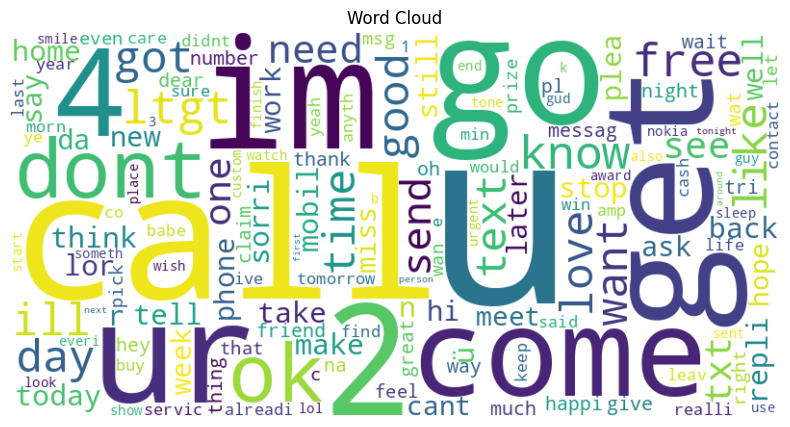

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.hist(df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


**POS Tagging and Named Entity Recognition (NER):**
* Besides POS tagging, you can perform Named Entity Recognition to identify named entities like names, locations, and organizations.

In [24]:
# Download the vader_lexicon resource
nltk.download('maxent_ne_chunker')
# Download the missing resource
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [25]:
from nltk import ne_chunk

# Named Entity Recognition (NER)
def ner(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    named_entities = ne_chunk(pos_tags, binary=True)
    return named_entities

# Apply NER to a sample message
sample_message = df.loc[0, 'message']
sample_ner = ner(sample_message)
print(sample_ner)


(S
  Go/NNP
  until/IN
  jurong/JJ
  point/NN
  ,/,
  crazy/JJ
  ../NN
  Available/NNP
  only/RB
  in/IN
  bugis/NN
  n/RB
  great/JJ
  world/NN
  la/NN
  e/FW
  buffet/NN
  .../:
  Cine/NNP
  there/EX
  got/VBD
  amore/RB
  wat/NN
  .../:)


**Visualizing Named Entities:**
* Visualize named entities in a message using the displacy module from the spaCy library.

In [26]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

# Visualize named entities using displacy
displacy.render(nlp(sample_message), jupyter=True, style='ent')
